# [Regression](https://en.wikipedia.org/wiki/Regression_analysis) 
   1. [seaborn plots](https://pypi.org/project/seaborn/) 
   2. [scikit_learn](http://scikit-learn.org/stable/) 
   3. [Scatter Plots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
   4. [Mean Square Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# create a practice data set
X0 = [    1,    1,    1,   1,     1]
X1 = [3.385, 0.48, 1.35, 465, 36.33]

# response
Y0 = [ 44.5, 15.5,  8.1, 423, 119.5]  

In [3]:
# arrange in the form Y = X*beta + epsilon
X = np.matrix([X0, X1]).T
Y = np.matrix(Y0).T

$$y = X\beta + \epsilon$$

In [4]:
# Estimate coefficients with matrix algebra
# beta-hat = inverse(transpose(X)*X)*transpose(X)*Y 
step1 = X.T * X 
step2 = step1.I
step3 = X.T * Y
step4 = step2 * step3

Steps:

+ Step 1: $ X^{T}X$
+ Step 2: $(X^{T}X)^{-1}$
+ Step 3: $ X^{T}y $
+ Step 4: $ (X^{T}X)^{-1}X^{T}y $


In [5]:
# the estimates of the coefficients of X0 and X1
beta_hat = (X.T * X).I * X.T * Y
print(beta_hat)

[[37.20089608]
 [ 0.83821876]]


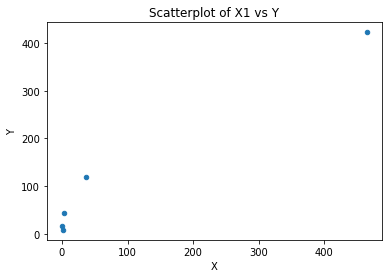

In [6]:
# Does that make sense?
# How are the independent and dependent variables related?
df = pd.DataFrame({'X':X1,
                   'Y':Y0})

# plot of X1 vs Y (similarly we can have for X0 vs Y)
df.plot(kind='scatter',
        x='X',
        y='Y',
        title='Scatterplot of X1 vs Y')

In [7]:
# Correlation coefficient between 
# the independent and dependent variables

np.corrcoef(df['X'],
            df['Y'])
df.corr() 

,X,Y
X,1.000000,0.982791
Y,0.982791,1.000000


In [8]:
# Lets capture our predictions 

# model prediction
df['Pred1'] = [37.20089608 + item * 0.83821876 for item in df['X']]

In [9]:
# QUICK VISUALIZATION FUNCTION
# required packages

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def corr_matrix(data):
    '''
    Plots a correlation heatmap for a given dataframe
    '''
    
    sns.set(style="white")
    corr = data.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# Lets apply this to a real dataset
adv = pd.read_csv('../../data/Advertising.csv') #read dataset
adv.head()


,TV,Radio,Newspaper,Sales,Region
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,1
2,17.2,45.9,69.3,9.3,1
3,151.5,41.3,58.5,18.5,1
4,180.8,10.8,58.4,12.9,1


### YOU TRY! ESTIMATE COEFFICIENTS (5 min)
+ Estimate the coefficients for a linear regression for input value "TV" and response value "Sales"

### Calculating $R^2$ AND Root Mean Squared Error (RMSE)

In [ ]:
# First with our dummy dataset 'df'

TSS = sum([(df['Y'].mean() - df.loc[n,'Y'])**2
           for n in range(len(df))])

RSS = sum([(df.loc[n,'Pred1'] - df.loc[n,'Y'])**2
           for n in range(len(df))])

R_SQU = 1 - (RSS / TSS)

A_R_SQU = (1 - ((1 - R_SQU) * (len(df) - 1) 
           / (len(df) - 2 - 1)))

RMSE = np.sqrt(
            np.mean([(df.loc[n,'Pred1']
                      - df.loc[n,'Y'])**2
                     for n in range(len(df))]))

print(RMSE)

In [ ]:
# printing with rounding off upto 3, 4 and 2 decimal places. 
print('--------|-Pred1-')
print(' R_SQU  | '+str(round(R_SQU, 3)) + ' ')
print('A_R_SQU | '+str(round(A_R_SQU, 4)) + ' ')
print('  RMSE  | '+str(round(RMSE, 2)) + ' ')


### YOU TRY! EVALUATE OUR FIRST MODEL  (5 min)
+  Use the Advertising dataset 'adv'

### YOU TRY! CREATE AND EVALUATE A NEW MODEL (10 min)
+ How does this model compare to a model that includes the TV and newspaper variables?
+ Create a model, and evaluate it's performance compared to the last one.

In [ ]:
# CREATING DUMMY VARIABLES
# Is including region in your prediction likely to have an impact?
adv.groupby('Region')['Sales'].mean()

In [ ]:
# Create new variables for each region
region_dummies = pd.get_dummies(adv.Region, prefix='Region')

In [ ]:
# Keep all but one of them
region_dummies = region_dummies.iloc[:, 1:]

In [ ]:
# Merge your dummy variables back onto your Advertising dataset
adv = pd.concat([adv, region_dummies], axis=1)

In [ ]:
# create new feature 'Area', randomly assign as 'rural' or 'suburban' or 'urban'

# random seeds ensure that results are consistant 
np.random.seed(12345)

nums = np.random.rand(len(adv))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
adv['Area'] = 'rural'
adv.loc[mask_suburban, 'Area'] = 'suburban'
adv.loc[mask_urban, 'Area'] = 'urban'

### YOU TRY (5 min)
+ Create dummy variables 'Area_suburban' and 'Area_urban'

### YOU TRY! CREATE A FUNCTION FOR OUR LINEAR REGRESSION MODEL (15 min)
+ Use this function to quickly evaluate a few different combinations of variables
+ Record your best model and compare to your prior models